In [2]:
%config InlineBackend.rc = {"figure.dpi": 72, 'figure.figsize': (6.0, 4.0)}
%matplotlib inline

import abtem
import ase
import matplotlib.pyplot as plt
import numpy as np

abtem.config.set({"local_diagnostics.progress_bar": True});

# Visualizations

## Adjusting individual elements

In [3]:
atoms = ase.build.mx2(vacuum=2)
atoms = abtem.orthogonalize_cell(atoms) * (3, 2, 1)

wave = abtem.PlaneWave(energy=80e3, sampling=0.05)

exit_wave = (
    wave.multislice(atoms).apply_ctf(defocus=2000, Cs=np.linspace(0, 1e7, 4)).compute()
)

measurements = exit_wave.complex_images()

[########################################] | 100% Completed | 2.14 ss


In [255]:
probe = abtem.Probe(
    semiangle_cutoff=30,
    defocus=np.linspace(0, 200*0, 2),
    # Cs=np.linspace(0, 4e6, 10),
    C5=np.linspace(0, 20e10, 3),
    gpts=64,
    extent=15,
    energy=100e3,
)
probes = probe.build().intensity().compute()

[########################################] | 100% Completed | 107.01 ms


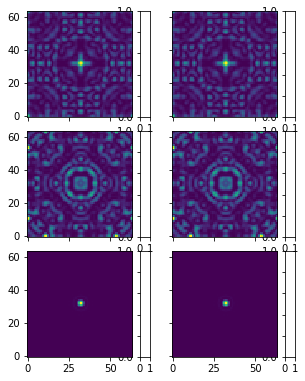

In [263]:
from abtem.visualize import (
    MeasurementVisualization2D,
    make_default_sizes,
    AxesGrid,
)

fig = plt.figure(figsize=(6, 6))

axes = AxesGrid(fig, 2, 3, 1, cbar_mode="each")

visualization = MeasurementVisualization2D(
    probes, axes, axes_types=("explode","explode"), cbar=True
)

#visualization.set_cbar_padding([.3,.5])
#visualization.set_normalization(vmin=0.)
#visualization.set_axes_padding([.4,.4])

In [224]:
np.array(axes)

array(<abtem.visualize.AxesGrid object at 0x7f8356167f40>, dtype=object)

In [ ]:
fig, axes = plt.subplots(1, 2, width_ratios=[3, 1])

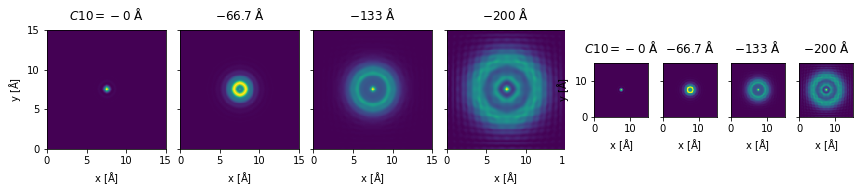

In [59]:
# from abtem.visualize import Measurement2DVisualizationAxes

fig = plt.figure(figsize=(12, 2))
subfigs = fig.subfigures(1, 2, wspace=1000, width_ratios=[2, 1])

visualization = probes[:].show(fig=subfigs[0], explode=True)
visualization = probes[:].show(fig=subfigs[1], explode=True)

# visualization = Measurement2DVisualizationAxes(
#    probes, common_color_scale=False, fig=fig, cbar=False, axes_types=("range",)
# )

# plt.savefig("test.png", bbox_inches="tight")

In [44]:
subfigs = fig.subfigures?

Signature:
fig.subfigures(
    nrows=1,
    ncols=1,
    squeeze=True,
    wspace=None,
    hspace=None,
    width_ratios=None,
    height_ratios=None,
    **kwargs,
)
Docstring:
Add a subfigure to this figure or subfigure.

A subfigure has the same artist methods as a figure, and is logically
the same as a figure, but cannot print itself.
See :doc:`/gallery/subplots_axes_and_figures/subfigures`.

Parameters
----------
nrows, ncols : int, default: 1
    Number of rows/columns of the subfigure grid.

squeeze : bool, default: True
    If True, extra dimensions are squeezed out from the returned
    array of subfigures.

wspace, hspace : float, default: None
    The amount of width/height reserved for space between subfigures,
    expressed as a fraction of the average subfigure width/height.
    If not given, the values will be inferred from a figure or
    rcParams when necessary.

width_ratios : array-like of length *ncols*, optional
    Defines the relative widths of the columns. Each

In [27]:
slider = list(visualization.make_sliders().values())[0]


def slider_update(change):
    print(change)


slider.observe(slider_update, "value")

slider

SelectionSlider(continuous_update=False, description='$C10 \\ [\\mathrm{\\AA}]$', options=('-0.000', '-66.667'…

In [ ]:
# visualization.set_indices((i,))

In [269]:
import time

for i in range(200):
    visualization.set_indices((i,))
    # visualization.fig.canvas.flush_events()
    # time.sleep(0.01)

In [222]:
visualization.set_normalization(power=1)

In [37]:
a = visualization._images[0, 0].get_array()
a[:] = 0.0

visualization._images[0, 0].set_array(a)

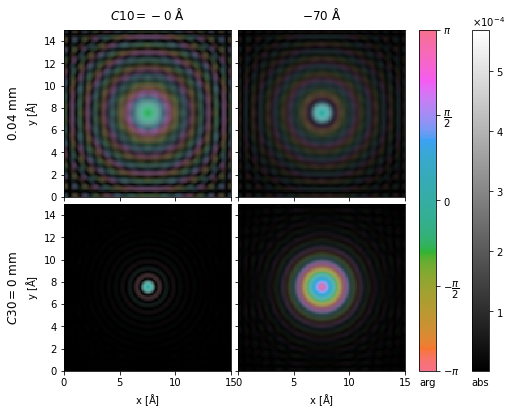

In [216]:
visualization.set_cbar_padding([0.2, 0.5])
visualization.set_cbar_spacing(0.5)
visualization.set_axes_padding([0.1, 0.1])
visualization.set_cbars()
visualization.set_scale_units()
visualization.set_cbar_labels()
visualization.set_x_units()
visualization.set_y_units()
visualization.set_x_labels()
visualization.set_y_labels()
# visualization.axis_off()
visualization.set_row_titles(units="mm")
visualization.set_column_titles()

visualization.fig

In [ ]:
horiz = list(sizes.values())
vert = [Size.Scaled(1)]

rect = (0.1, 0.1, 0.8, 0.8)
divider = Divider(fig, rect, horiz, vert, aspect=False)

ax1 = fig.add_axes(rect)
ax1.set_axes_locator(divider.new_locator(nx=0, nx1=1, ny=0))

ax2 = fig.add_axes(rect)
ax2.set_axes_locator(divider.new_locator(nx=3, ny=0))

ax3 = fig.add_axes(rect)
ax3.set_axes_locator(divider.new_locator(nx=5, ny=0))

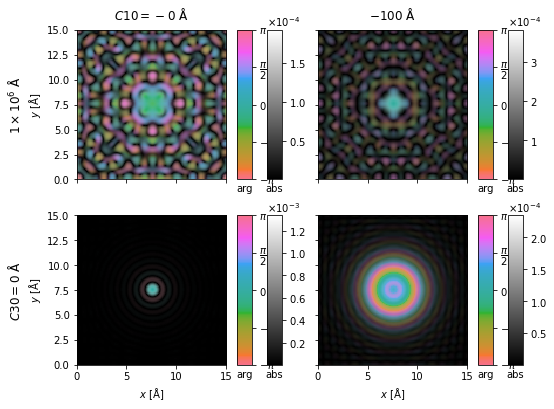

In [541]:
viz_axes = probes.show(
    explode=True,
    figsize=(8, 8),
    title=True,
    cbar=True,
    common_color_scale=False,
    cmap="hsv",
    # cbar=False,
)


viz_axes.set_cbar_spacing(0)
viz_axes.set_cbar_fractions(0.3)
viz_axes.set_cbar_padding([0.15, 0.5])
viz_axes.axes.set_axes_pad([0.5, 0.5])

In [538]:
viz_axes._cbar_spacing[0].fixed_size

20

In [509]:
f = c._get_cbar_fractions()

In [523]:
for cbar in viz_axes._cbars:
    loc = cbar[0].ax.get_axes_locator()._divider

AttributeError: '_ColorbarAxesLocator' object has no attribute '_divider'

In [ ]:
loc.get_subplotspec

In [510]:
f[0].

In [498]:
viz_axes.axes.get_divider().get_horizontal()

In [214]:
viz_axes.set_x_units("nm")
viz_axes.set_y_units("nm")

viz_axes.set_x_label()
viz_axes.set_y_label()

viz_axes.set_column_titles(units="mm")
viz_axes.set_sizebars()

viz_axes.set_colorbars(label="Intensity [a.u.]")

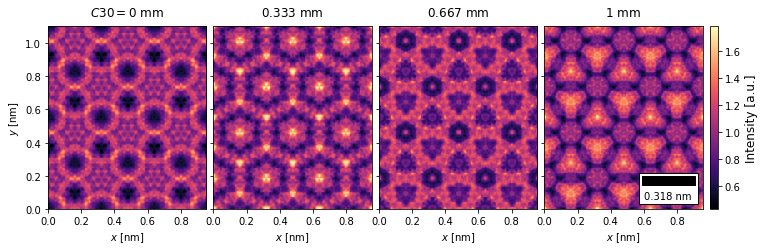

In [216]:
viz_axes.fig

## Exploded plot with two dimensions

In [203]:
from ase.build import graphene

defocus = np.linspace(-50, 50, 7)
Cs = np.linspace(0, 400000, 5)

wave = abtem.PlaneWave(energy=80e3, sampling=0.05)

atoms = graphene(vacuum=2)
atoms = abtem.orthogonalize_cell(atoms)

exit_wave = wave.multislice(atoms)

focal_spread = 30
defocus_distribution = abtem.distributions.gaussian(
    center=0.0,
    standard_deviation=focal_spread,
    num_samples=101,
    sampling_limit=2,
)

images = (
    exit_wave.apply_ctf(defocus=defocus, Cs=Cs)
    .apply_ctf(defocus=defocus_distribution)
    .intensity()
    .sum(0)
    .compute()
)

[########################################] | 100% Completed | 1.15 sms


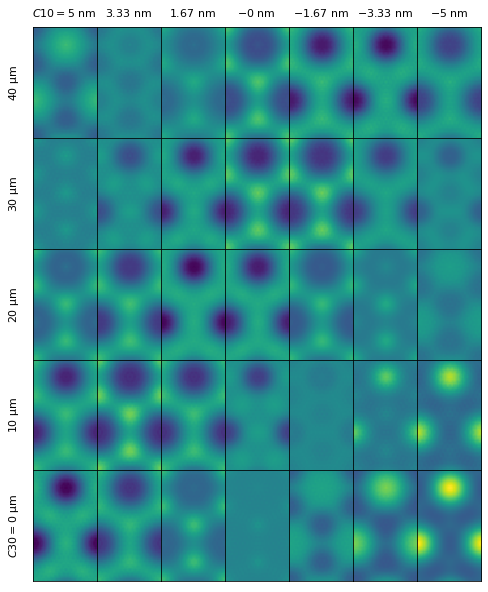

In [219]:
visualization = images.show(
    explode=True, figsize=(10, 10), common_color_scale=True, cmap="gray"
)

visualization.axes.set_axes_pad([0.0, 0.0])
visualization.axis_off()
visualization.set_row_titles(units="um", fontsize=11)
visualization.set_column_titles(units="nm", fontsize=11)

In [221]:
visualization._amplitude_images[0].axes

<Axes: >

## Custom arranged images

In [9]:
atoms = ase.build.mx2(vacuum=2)
atoms = abtem.orthogonalize_cell(atoms) * (3, 2, 1)

projected_potential_xy = (
    abtem.Potential(atoms, sampling=0.05, plane="xy").project().compute()
)
projected_potential_xz = (
    abtem.Potential(atoms, sampling=0.05, plane="xz").project().compute()
)

[########################################] | 100% Completed | 105.81 ms
[########################################] | 100% Completed | 417.51 ms


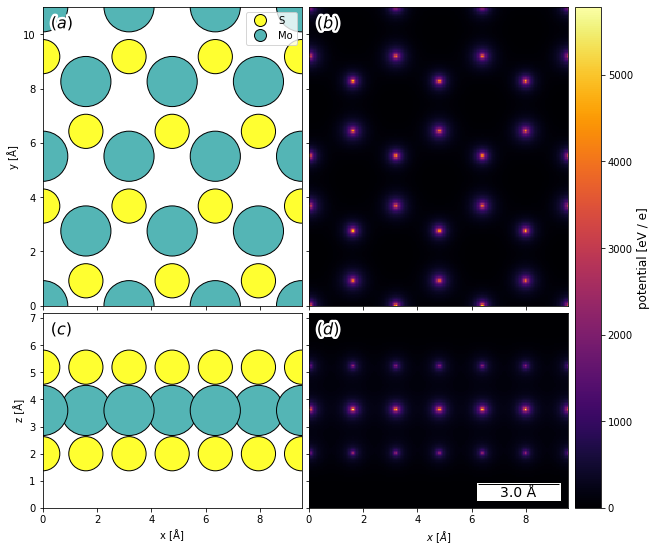

In [10]:
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(10, 10))

axes = ImageGrid(fig, 111, (2, 2), cbar_mode="single", axes_pad=0.1)

abtem.show_atoms(
    atoms,
    tight_limits=True,
    show_cell=False,
    show_periodic=True,
    legend=True,
    scale=0.6,
    ax=axes[0],
)

abtem.show_atoms(
    atoms,
    tight_limits=True,
    show_cell=False,
    show_periodic=True,
    scale=0.6,
    ax=axes[2],
    plane="xz",
)

projected_potential_xy.show(ax=axes[1], cmap="inferno", cbar=True)
projected_potential_xz.show(ax=axes[3], cmap="inferno", cbar=True)

abtem.visualize.add_sizebar(
    ax=axes[3],
    measurements=projected_potential_xy,
    size=3,
    fontproperties={"size": 14},
    formatting=".1f",
)

abtem.visualize.add_panel_labels(
    axes,
    prop={"size": 16},
)